In [1]:
import pandas as pd
import numpy as np

In [2]:
# Scans through the CSV chunk by chunk (where a chunk is 10000 rows),
# appending data points with the correct year to another array

# Once it is done reading all the data point for a given year,
# a DataFrame with the desired information is returned
def getOneYearData(filename, year):
    oneYearData = []
    row_count = 10000
    foundYear = False
    
    for chunk in pd.read_csv(filename, chunksize=row_count):
        for ind in chunk.index:
            if chunk['year'][ind] == np.int64(year):
                oneYearData.append(chunk.loc[ind])
                foundYear = True
            else:
                if foundYear is True:
                    df = pd.DataFrame(oneYearData)
                    print(len(df.index))
                    return df

In [3]:
# Iterates through a list of years
# and gets the data for each year,
# returning a DataFrame
def getMultipleYearData(filename, years):
    multipleYearData = pd.DataFrame()
    
    for year in years:
        newData = getOneYearData(filename, year)
        multipleYearData = pd.concat([multipleYearData, newData], axis=0)
    
    print(len(multipleYearData.index))
    return multipleYearData

In [4]:
# Gets the total donations, as well as the
# Republican and Democratic donations for each state
def getStatsForCountry(data):
    states = {"AL": [0,0,0], 
              "AK": [0,0,0], 
              "AZ": [0,0,0], 
              "AR": [0,0,0], 
              "CA": [0,0,0], 
              "CO": [0,0,0], 
              "CT": [0,0,0], 
              "DE": [0,0,0], 
              "FL": [0,0,0], 
              "GA": [0,0,0], 
              "HI": [0,0,0], 
              "ID": [0,0,0], 
              "IL": [0,0,0], 
              "IN": [0,0,0], 
              "IA": [0,0,0], 
              "KS": [0,0,0], 
              "KY": [0,0,0], 
              "LA": [0,0,0], 
              "ME": [0,0,0], 
              "MD": [0,0,0], 
              "MA": [0,0,0], 
              "MI": [0,0,0], 
              "MN": [0,0,0], 
              "MS": [0,0,0], 
              "MO": [0,0,0], 
              "MT": [0,0,0], 
              "NE": [0,0,0], 
              "NV": [0,0,0], 
              "NH": [0,0,0], 
              "NJ": [0,0,0], 
              "NM": [0,0,0], 
              "NY": [0,0,0], 
              "NC": [0,0,0], 
              "ND": [0,0,0], 
              "OH": [0,0,0], 
              "OK": [0,0,0], 
              "OR": [0,0,0], 
              "PA": [0,0,0], 
              "RI": [0,0,0], 
              "SC": [0,0,0], 
              "SD": [0,0,0], 
              "TN": [0,0,0], 
              "TX": [0,0,0], 
              "UT": [0,0,0], 
              "VT": [0,0,0], 
              "VA": [0,0,0], 
              "WA": [0,0,0], 
              "WV": [0,0,0], 
              "WI": [0,0,0], 
              "WY": [0,0,0]}
    
    for ind in data.index:
        if data['state'][ind] in states:
            if data['party'][ind] == "DEM":
                states[data['state'][ind]][0] += data['adjusted'][ind]
            elif data['party'][ind] == "REP":
                states[data['state'][ind]][1] += data['adjusted'][ind]

            states[data['state'][ind]][2] += data['adjusted'][ind]
    
    return states

In [5]:
# Prints the top X states with the highest donations,
# and provides a breakdown of the party affiliation
def printTopXStates(stats, x):
    counter = 0

    for key, value in sorted(stats.items(), key=lambda item: item[1][2], reverse=True):
        percentDem = (value[0]/value[2])
        percentRep = (value[1]/value[2])
        percentInd = (1 - percentDem - percentRep)
        
        print("%s: %s dem, %s rep, %s independent" % (key, str(percentDem), str(percentRep), str(percentInd)))
        counter += 1
        if counter >= x:
            return

In [6]:
# Given a set of year intervals in the form [[2000, 2004], [2005, 2009], ...],
# returns the percentage of Republican, Democratic and Independent donations for each interval
def findPartyTrends(yearIntervals):
    states = {"AL": [], 
              "AK": [], 
              "AZ": [], 
              "AR": [], 
              "CA": [], 
              "CO": [], 
              "CT": [], 
              "DE": [], 
              "FL": [], 
              "GA": [], 
              "HI": [], 
              "ID": [], 
              "IL": [], 
              "IN": [], 
              "IA": [], 
              "KS": [], 
              "KY": [], 
              "LA": [], 
              "ME": [], 
              "MD": [], 
              "MA": [], 
              "MI": [], 
              "MN": [], 
              "MS": [], 
              "MO": [], 
              "MT": [], 
              "NE": [], 
              "NV": [], 
              "NH": [], 
              "NJ": [], 
              "NM": [], 
              "NY": [], 
              "NC": [], 
              "ND": [], 
              "OH": [], 
              "OK": [], 
              "OR": [], 
              "PA": [], 
              "RI": [], 
              "SC": [], 
              "SD": [], 
              "TN": [], 
              "TX": [], 
              "UT": [], 
              "VT": [], 
              "VA": [], 
              "WA": [], 
              "WV": [], 
              "WI": [], 
              "WY": []}
    
    for interval in yearIntervals:
        data = getMultipleYearData("cleanDataWithPartiesInflation.csv", interval)
        stats = getStatsForCountry(data)
        
        for key, value in stats.items():
            percentDem = (value[0]/value[2])
            percentRep = (value[1]/value[2])
            percentInd = (1 - percentDem - percentRep)
            states[key].append([percentDem, percentRep, percentInd])
    
    return states

In [7]:
yearIntervals = [[1979,1980], [1981,1982], [1983,1984], [1985,1986], [1987,1988], [1989,1990]]
trends = findPartyTrends(yearIntervals)

78268
97002
175270
31860
58516
90376
44697
83398
128095
47701
92658
140359
79320
119447
198767
103535
153292
256827


In [8]:
# Takes in a set of trend data and organizes
# Republican, Democratic and Independent stats into their own arrays
demTrend = []
repTrend = []
indTrend = []

for data in trends['CO']:
    demTrend.append(data[0])
    repTrend.append(data[1])
    indTrend.append(data[2])

print(demTrend, repTrend, indTrend)

[0.1226514076505613, 0.27923463607814836, 0.2286131382715857, 0.2015343443840336, 0.340771230476843, 0.35591110616407806] [0.8676631612902076, 0.7095733287438584, 0.7607904615328943, 0.7928294650995784, 0.6524495080829585, 0.6351350447198542] [0.009685431059231142, 0.011192035177993276, 0.010596400195519995, 0.005636190516387973, 0.00677926144019847, 0.00895384911606778]


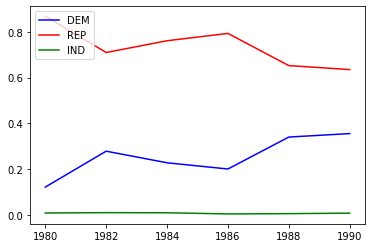

In [10]:
import matplotlib.pyplot as plt

# A plot of the party affiliation trends
# for a single state from 1980-1990
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.xaxis.set_ticks(np.arange(1980, 1992, 2))

ax1.plot([1980, 1982, 1984, 1986, 1988, 1990], demTrend, color='b', label="DEM")
ax1.plot([1980, 1982, 1984, 1986, 1988, 1990], repTrend, color='r', label='REP')
ax1.plot([1980, 1982, 1984, 1986, 1988, 1990], indTrend, color='g', label='IND')

plt.legend(loc='upper left')
plt.show()